# Imbalance Classification: Feature Engineering

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline

In [4]:
wine= pd.read_csv('white_wine.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0


In [ ]:
# EDA

Target data: quality, dimana quality>6 adalah good wine, dan sisanya adalah bad wine

In [5]:
wine['label']=np.where(wine['quality']>6,1,0)
wine['label'].value_counts()/wine.shape[0]*100

0    81.153846
1    18.846154
Name: label, dtype: float64

In [6]:
wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      1
sulphates               1
alcohol                 1
quality                 1
label                   0
dtype: int64

In [7]:
wine['alcohol']=wine['alcohol'].fillna(wine['alcohol'].mean())

Fitur yang akan kita pakai dalam prediksi kali ini adalah density dan alcohol. Mari kita lihat dengan scatterplot, apakah kedua fitur ini mampu memisahkan good wine dan bad wine.

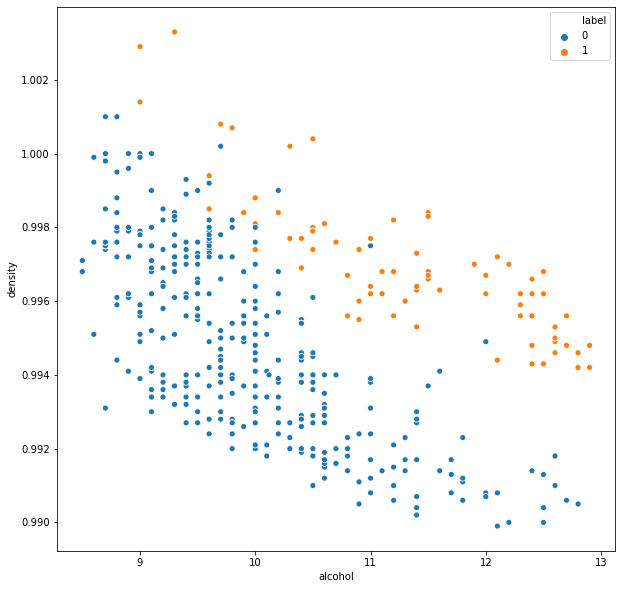

In [9]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='alcohol',y='density', data= wine, hue= 'label')

Secara umum, good wine memiliki alcohol dan density yang lebih tinggi dibanding bad wine

In [ ]:
# Data Splitting

In [10]:
x= wine[['density', 'alcohol']]
y=wine['label']

In [11]:
x_train, x_test, y_train, y_test= train_test_split(x,y, stratify=y, random_state=2020)

## Model without polynomial

In [20]:
logreg= LogisticRegression()
logreg.fit(x_train, y_train)
y_pred=logreg.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       106
           1       0.69      0.38      0.49        24

    accuracy                           0.85       130
   macro avg       0.78      0.67      0.70       130
weighted avg       0.84      0.85      0.84       130



## With Polynomial

In [21]:
poly=PolynomialFeatures(degree=3, interaction_only=False, include_bias=False)
logreg= LogisticRegression(max_iter=1000)
estimator= Pipeline([
    ('poly', poly),
    ('model',logreg)
])

In [22]:
estimator.fit(x_train, y_train)
y_pred= estimator.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       106
           1       0.95      0.88      0.91        24

    accuracy                           0.97       130
   macro avg       0.96      0.93      0.95       130
weighted avg       0.97      0.97      0.97       130



Dari contoh kasus di atas, bisa dilihat bahwa dengan melakukan feature engineering polynomial, kita berhasil meningkatkan performa model, dari:  
* precision: 0.69 --> 0.95  
* recall: 0.38 --> 0.88
* f1_score: 0.49 --> 0.91
* accuracy: 0.85 --> 0.97

# Resampling

In [23]:
# !pip install imblearn

In [25]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss

from sklearn.metrics import roc_curve, plot_roc_curve, roc_auc_score, f1_score
from imblearn.pipeline import Pipeline #perhatikan librarynya

## Data

In [26]:
bankloan= pd.read_csv('bankloan.csv')
bankloan.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1


In [27]:
x=bankloan[['employ','debtinc' ,'creddebt','othdebt']]
y=bankloan['default']

## EDA

In [28]:
bankloan['default'].value_counts()/bankloan.shape[0]*100

0    73.857143
1    26.142857
Name: default, dtype: float64

Bisa dilihat bahwa dataset bankloan.csv memiliki kelas yang tidak seimbang, di mana kelas 1 (default) merupakan kelas minoritas (26.14 %). 

## Splitting data

In [31]:
x_train, x_test, y_train, y_test= train_test_split(x,y, stratify=y, test_size=.2, random_state= 2020)

## No treatment

In [32]:
model= LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [33]:
y_pred=model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89       103
           1       0.77      0.46      0.58        37

    accuracy                           0.82       140
   macro avg       0.80      0.71      0.73       140
weighted avg       0.82      0.82      0.80       140



## Resampling: Undersampling

In [40]:
rus=RandomUnderSampler()
x_under, y_under=rus.fit_resample(x_train,y_train) # library resample memakai metode resample, bukan transform

In [42]:
y_train.value_counts() #before resampling

0    414
1    146
Name: default, dtype: int64

In [41]:
y_under.value_counts() #after resampling

1    146
0    146
Name: default, dtype: int64

In [37]:
model_under=Pipeline([
    ('resampling', rus),
    ('model', LogisticRegression())
])

In [39]:
model_under.fit(x_train,y_train)
y_pred= model_under.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.68      0.79       103
           1       0.50      0.89      0.64        37

    accuracy                           0.74       140
   macro avg       0.72      0.79      0.72       140
weighted avg       0.83      0.74      0.75       140



# Algorithm based: Parameter class_weight

In [43]:
model_balanced= LogisticRegression(class_weight='balanced')
model_balanced.fit(x_train,y_train)
y_pred=model_balanced.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.68      0.78       103
           1       0.48      0.84      0.61        37

    accuracy                           0.72       140
   macro avg       0.70      0.76      0.70       140
weighted avg       0.81      0.72      0.74       140



In [44]:
models=[model, model_under, model_balanced]
f1=[]
for i in models:
    f1.append(f1_score(y_test, i.predict(x_test)))

In [45]:
pd.DataFrame({
    'method':['benchmark','undersampling','class weight'],
    'score': f1
})

,method,score
0,benchmark,0.576271
1,undersampling,0.640777
2,class weight,0.613861


# Metric evaluation: Threshold optimization

In [93]:
x_train2, x_val, y_train2, y_val= train_test_split(x_train,y_train, stratify=y_train, test_size=.25, random_state= 2020)

In [94]:
model.fit(x_train2,y_train2)

th_value= [i/100 for i in range(20,60)]
score=0
score_list=[]

for i in th_value:
    y_prob= model.predict_proba(x_val)[:,1]
    y_pred=np.where(y_prob>i,1,0)
    score_temp= f1_score(y_val,y_pred)
    score_list.append(score_temp)
    
    if score_temp>score:
        score=score_temp
        
        best_score=score
        best_th=i

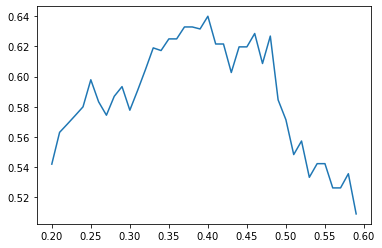

In [95]:
sns.lineplot(th_value,score_list)

In [96]:
print('best score', best_score)
print('best th', best_th)

best score 0.64
best th 0.4


In [97]:
model.fit(x_train,y_train)
y_prob= model.predict_proba(x_test)[:,1]
y_pred=np.where(y_prob>best_th,1,0)

In [98]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       103
           1       0.54      0.54      0.54        37

    accuracy                           0.76       140
   macro avg       0.69      0.69      0.69       140
weighted avg       0.76      0.76      0.76       140



In [53]:
print(f1_score(y_test,y_pred))

0.5405405405405406


In [74]:
## roc auc curve

In [92]:
model.fit(x_train2,y_train2)
y_prob_val=model.predict_proba(x_val)[:,1]
y_pred_val=model.predict(x_val)

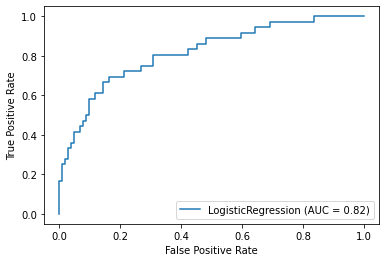

In [83]:
plot_roc_curve(model,x_val,y_val)

In [91]:
fpr, tpr, th=roc_curve(y_val,y_prob_val)

In [87]:
roc=pd.DataFrame({
    'fpr':fpr,
    'tpr':tpr,
    'threshold':th
})

In [88]:
roc.loc[(roc['tpr']>0.6) & (roc['tpr']<0.8)]

,fpr,tpr,threshold
22,0.115385,0.611111,0.468087
23,0.144231,0.611111,0.435862
24,0.144231,0.666667,0.406243
25,0.163462,0.666667,0.387117
26,0.163462,0.694444,0.385049
27,0.211538,0.694444,0.336182
28,0.211538,0.722222,0.335322
29,0.269231,0.722222,0.301064
30,0.269231,0.750000,0.291544
31,0.307692,0.750000,0.262379


In [99]:
th_=roc['threshold'].iloc[30]

In [100]:
y_pred=np.where(y_prob>th_,1,0)

In [101]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.76      0.82       103
           1       0.52      0.73      0.61        37

    accuracy                           0.75       140
   macro avg       0.70      0.74      0.71       140
weighted avg       0.79      0.75      0.76       140



In [66]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve

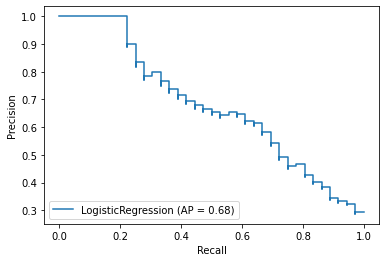

In [102]:
plot_precision_recall_curve(model, x_val,y_val)

In [103]:
p,r,th= precision_recall_curve(y_val,y_prob_val)

In [104]:
th=list(th)
th.insert(0,0)

In [105]:
pr_curve= pd.DataFrame({
    'precision':p,
    'recall':r,
    'threshold': th
})

In [106]:
pr_curve.loc[pr_curve['threshold']>.35]

,precision,recall,threshold
80,0.581395,0.694444,0.360311
81,0.595238,0.694444,0.384533
82,0.585366,0.666667,0.385049
83,0.600000,0.666667,0.387117
84,0.615385,0.666667,0.399207
85,0.605263,0.638889,0.406243
86,0.594595,0.611111,0.423689
87,0.611111,0.611111,0.435862
88,0.628571,0.611111,0.439722
89,0.647059,0.611111,0.452268


# Combining Cross Validation with Balancing Method

In [107]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report, f1_score
pd.set_option('display.max_columns', None)

Masih dengan dataset bankloan

## Resampling Smote

In [121]:
smote=SMOTE()
model=LogisticRegression(random_state=2020)
estimator= Pipeline([
    ('resampling', SMOTE(random_state=2020)),
    ('model',model)
])

In [122]:
skfold= StratifiedKFold(n_splits=5)
model_cv=cross_val_score(estimator, x_train, y_train, cv=skfold, scoring='f1')

In [126]:
from sklearn.metrics import SCORERS
# SCORERS

In [124]:
print('cv score', model_cv)
print('cv score mean', model_cv.mean())

cv score [0.63013699 0.57575758 0.6097561  0.6031746  0.60526316]
cv score mean 0.6048176841378522


## Class_Weight

In [128]:
model= LogisticRegression(class_weight='balanced', random_state=2020)
model_cv= cross_val_score(model, x_train,y_train, cv=skfold, scoring='f1')

In [129]:
print('cv score', model_cv)
print('cv score mean', model_cv.mean())

cv score [0.63888889 0.58823529 0.61728395 0.58064516 0.60526316]
cv score mean 0.6060632905617759


metode class weight memiliki score sedikit lebih baik

## Hyperparameter Tunning

In [132]:
# make algorithm chain
smote=SMOTE(random_state=2020)
model= LogisticRegression(random_state=2020)
estimator= Pipeline([
    ('balancing', smote),
    ('model', model)
])

In [133]:
estimator.get_params()

{'memory': None,
 'steps': [('balancing', SMOTE(random_state=2020)),
  ('model', LogisticRegression(random_state=2020))],
 'verbose': False,
 'balancing': SMOTE(random_state=2020),
 'model': LogisticRegression(random_state=2020),
 'balancing__k_neighbors': 5,
 'balancing__n_jobs': None,
 'balancing__random_state': 2020,
 'balancing__sampling_strategy': 'auto',
 'model__C': 1.0,
 'model__class_weight': None,
 'model__dual': False,
 'model__fit_intercept': True,
 'model__intercept_scaling': 1,
 'model__l1_ratio': None,
 'model__max_iter': 100,
 'model__multi_class': 'auto',
 'model__n_jobs': None,
 'model__penalty': 'l2',
 'model__random_state': 2020,
 'model__solver': 'lbfgs',
 'model__tol': 0.0001,
 'model__verbose': 0,
 'model__warm_start': False}

In [138]:
hyperparam_space= {
    'balancing__k_neighbors':[2,5,10,15,20],
    'model__C':[100, 10, 1, 0.1, 0.01, 0.001],
    'model__solver':['liblinear','newton-cg'],
    'model__class_weight':[None,'balanced']
}

In [139]:
grid_search= GridSearchCV( estimator,
                         param_grid=hyperparam_space,
                         cv=skfold,
                         scoring='f1',
                         n_jobs=-1)

In [140]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('balancing', SMOTE(random_state=2020)),
                                       ('model',
                                        LogisticRegression(random_state=2020))]),
             n_jobs=-1,
             param_grid={'balancing__k_neighbors': [2, 5, 10, 15, 20],
                         'model__C': [100, 10, 1, 0.1, 0.01, 0.001],
                         'model__class_weight': [None, 'balanced'],
                         'model__solver': ['liblinear', 'newton-cg']},
             scoring='f1')

In [141]:
print('best score', grid_search.best_score_)
print('best param', grid_search.best_params_)

best score 0.6183972564061782
best param {'balancing__k_neighbors': 20, 'model__C': 100, 'model__class_weight': None, 'model__solver': 'liblinear'}


## Before vs After tunning

In [142]:
#before
smote=SMOTE(random_state=2020)
model= LogisticRegression(random_state=2020)
estimator= Pipeline([
    ('balancing', smote),
    ('model', model)
])

In [144]:
estimator.fit(x_train,y_train)
y_pred= estimator.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.70      0.80       103
           1       0.50      0.84      0.63        37

    accuracy                           0.74       140
   macro avg       0.71      0.77      0.71       140
weighted avg       0.81      0.74      0.75       140



In [145]:
#after
best_model= grid_search.best_estimator_
best_model.fit(x_train,y_train)
y_pred=best_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.70      0.80       103
           1       0.51      0.86      0.64        37

    accuracy                           0.74       140
   macro avg       0.72      0.78      0.72       140
weighted avg       0.82      0.74      0.76       140



Hyperparameter tunning meningkatkan f1 score dari .63 menjadi .64

# Latihan
Masih dengan menggunakan dataset bankloan, lakukan hyperparameter tunning dengan menggunakan metode resampling undersampling (nearmiss)  

Bandingkan performanya dengan metode SMOTE yang sudah kita lakukan di kelas